In [64]:
import glob
import joblib
import numpy as np
import matplotlib.pyplot as plt

std_scaler=joblib.load('./preproc/stdscaler.bin')

def rescale_mean_temp(data):
    array = np.vstack((data, data, data, data, data)).T
    return std_scaler.inverse_transform(array)[:, -1]


def show_predictions_and_mse(model_name):
    prev_n_days = ['2', '7', '30']
    categories = ['allfeatures', 'onlytempfeatures', 'wind']

    figure, axes = plt.subplots(1, 3, figsize=(30, 10))
    figure.suptitle(f'{model_name} model predictions', size='xx-large')

    for i, prev_n_day in enumerate(prev_n_days):
        axes[i].set_title(f'Previous {prev_n_day} days')
        true_labels = np.load(f'./predictions/true_labels-{prev_n_day}-allfeatures.npy', allow_pickle=True)
        true_labels = rescale_mean_temp(true_labels)
        axes[i].scatter(range(len(true_labels)), true_labels, label=f'true labels {prev_n_day}')
        
        for category in categories:
            predictions = np.load(f'./predictions/{model_name}/preds-prev{prev_n_day}-{category}.npy', allow_pickle=True)
            predictions = predictions
            mse = ((predictions - true_labels)**2).mean()
            axes[i].scatter(range(len(predictions)),predictions, label=f'predictions {prev_n_day} {category}, MSE = {round(mse, 2)}')

        axes[i].legend()

C:\Users\Valter\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# Linear regression

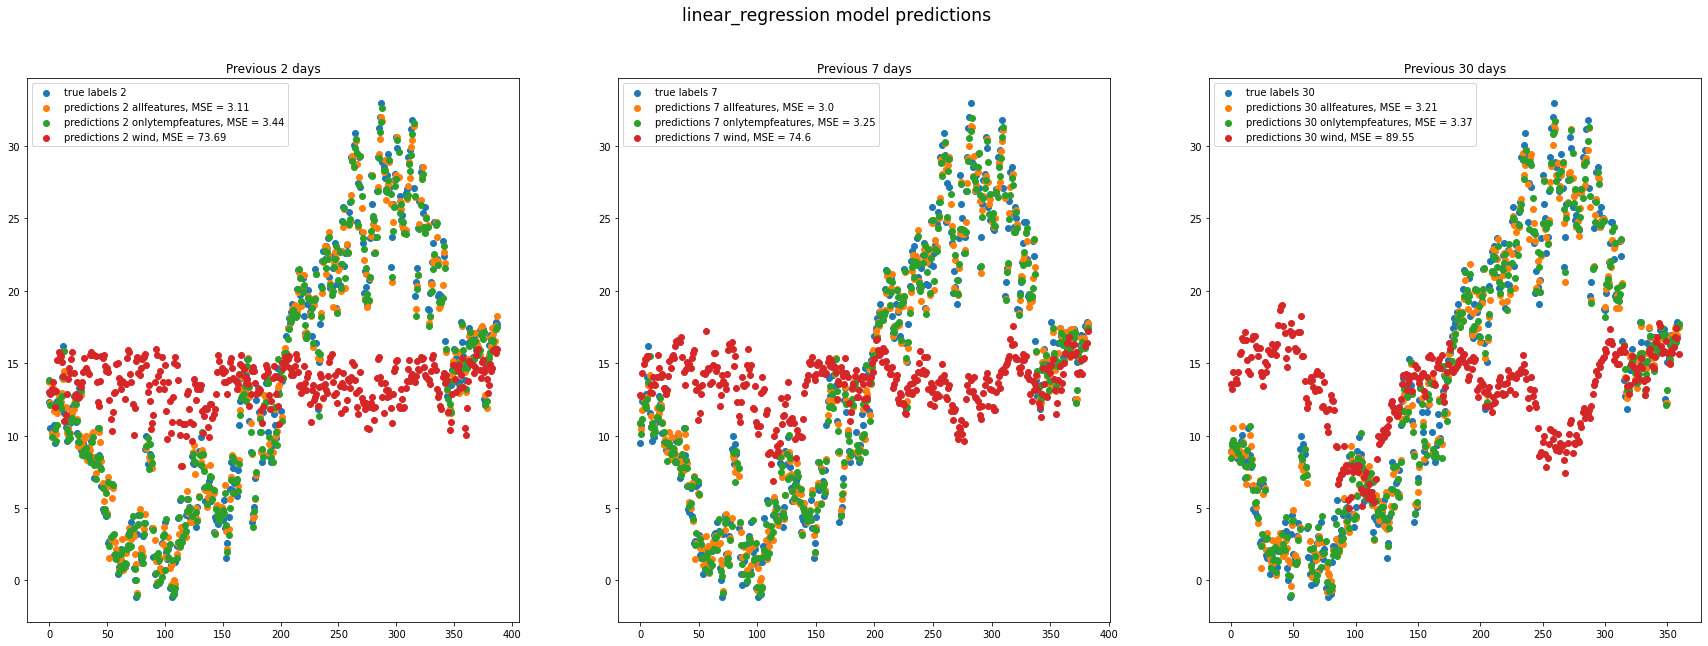

In [65]:
show_predictions_and_mse('linear_regression')

# Random forest

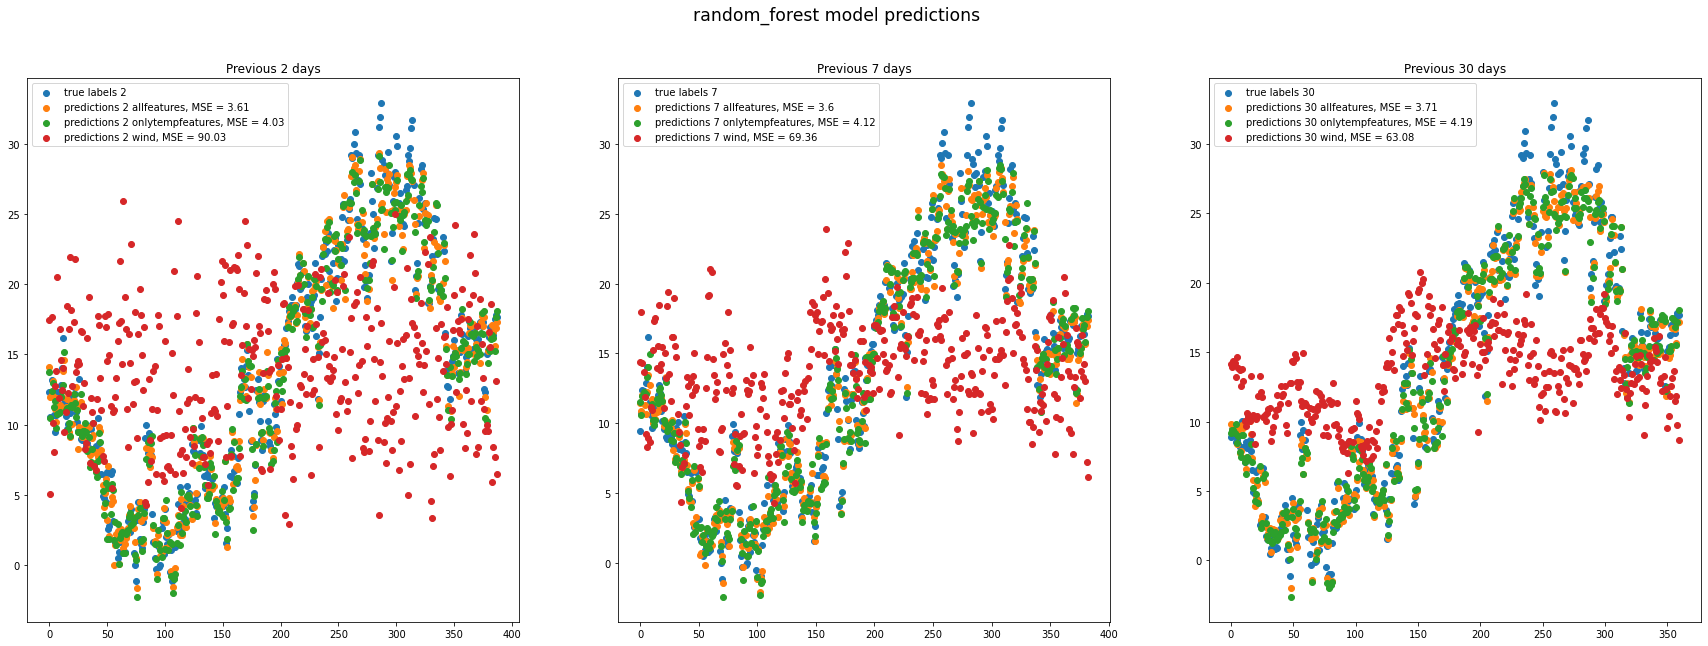

In [66]:
show_predictions_and_mse('random_forest')

# Multilayer perceptron

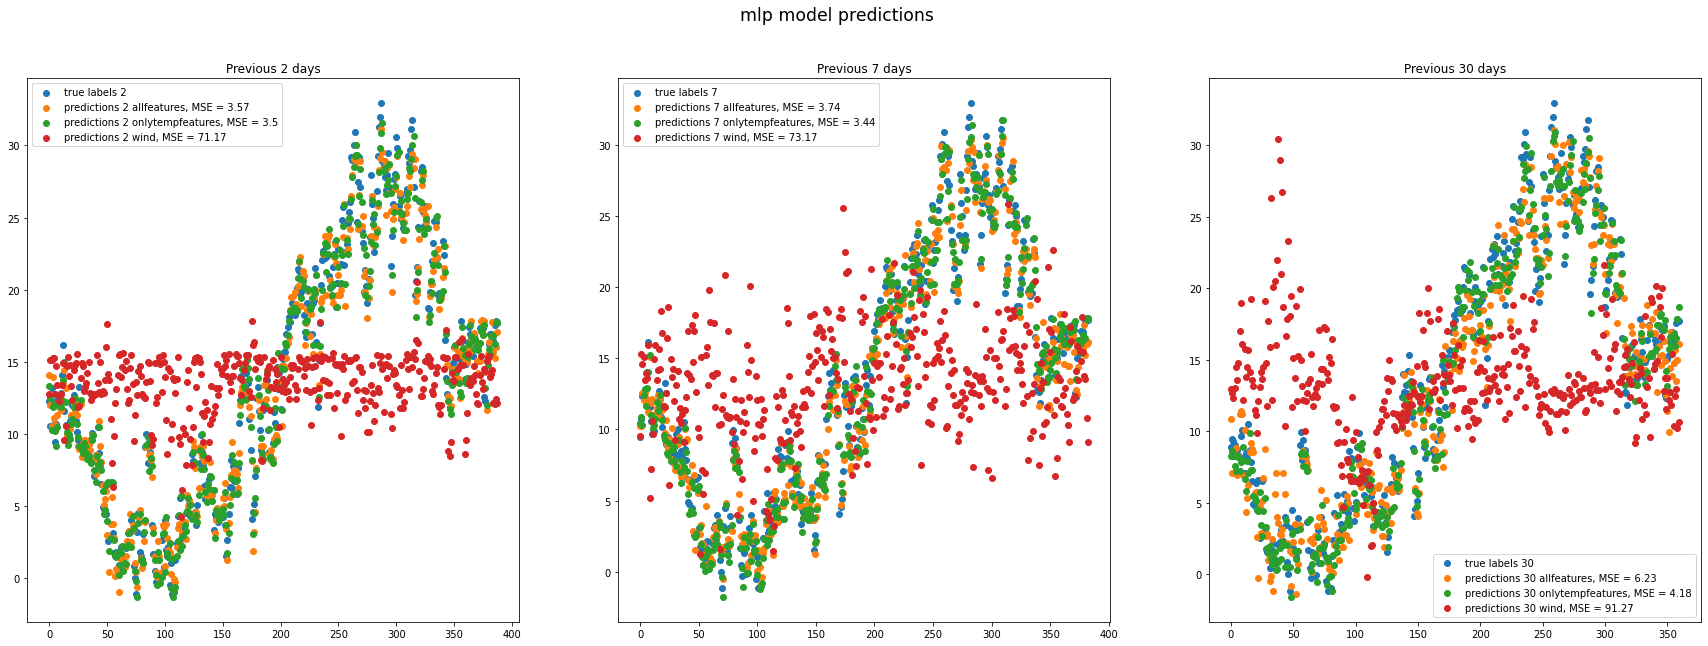

In [67]:
show_predictions_and_mse('mlp')